## Data and AI in Economics
Here is our work for the final project. Our mission is Bankruptcy prediction
Group members:
* Agyn Abdimomyn - 259655
* Thi Thanh Duyen Truong - 257804
* Mouhcine Leyne - 257968
* Trung Anh Ha - 214993


## Content:
**1. [Introduction](#part1)**

**2. [Importing librabries](#part2)**

**3. [Importing, oversampling and standardizing the data](#part3)**
* **3.1 [Importing data  and Overview of the Dataset](#part31)**
* **3.2 [Oversampling the data](#part32)**
* **3.3 [Data standardization](#part33)**

**4. [Features Selection and Exploratory Data Analysis (EDA)](#part4)**
* **4.1 [Features Selection](#part41)**
* **4.2 [Exploratory Data Analysis (EDA)](#part42)**
    * **4.2.1 [Distribution of quantitative data](#part421)**
    * **4.2.2 [Correlation of selected features](#part422)**
    
**5. [Data Modeling and Evaluation](#part5)**
* **5.1 [Modeling](#part51)**
    * **5.1.1 [Splitting data into training and test set](#part511)**
    * **5.1.2 [Build function to train and evaluate models](#part512)**
* **5.2 [Models Analysis and Evaluation](#part52)**
* **5.3 [Evaluating estimator performance of the best model](#part53)**

**6. [Conclusion and future work](#part6)**


## 1. Introduction <a name="part1"></a>
Bankruptcy prediction is one of the vital areas of research in financial risk management departments, aiming to identify firms that are likely to become financially unsustainable. If predicted accurately these models can provide early warnings, that allow shareholders to take preventive actions to avoid potential losses. The efficiency and accuracy of bankruptcy prediction models have increased significantly with the development of deep learning and machine learning technology, outperforming more conventional statistical techniques.

This research uses a highly-regarded dataset called Company Bankruptcy Prediction from Kaggle.com. The data was collected by the Taiwan Economic Journal from 1999 to 2009, with involvement from the Taiwan Stock Exchange to identify bankrupt companies. The dataset contains 6819 entries, each with 96 attributes representing conventional accounting ratios that reflect a company's financial stability. This dataset provides a comprehensive foundation for predictive modeling and explanatory data analysis (EDA) due to its extensive financial indicators, market data, and macroeconomic components.

This research has two main goals. First, we aim to perform a comprehensive Exploratory Data Analysis (EDA) to uncover important financial traits and patterns associated with both bankrupt and non-bankrupt businesses. This involves analyzing distributions, correlations, and relationships within the data to identify key factors that differentiate distressed companies from healthy ones. Second, we will use machine learning models specifically designed to predict bankruptcy, enhancing the accuracy and reliability of these models.

This research is important because it has the potential to add to the body of information already available in financial risk management and to offer useful tools for identifying financial hardship early on. Through a methodical examination of past financial data and the application of sophisticated analytical methods, our goal is to increase the precision of bankruptcy forecasts and provide stakeholders with useful information.

## 2. Importing libraries <a name="part2"></a>

In [ ]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic libraries for organization, statistical operations and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

# Library to deal with the data imbalance
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Import classification models
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Import machine learning models
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier

## 3. Importing, oversampling and standardizing the data  <a name="part3"></a>

### 3.1 Importing data and Overview of the Dataset  <a name="part31"></a>

In [ ]:
# Load the dataset
dataset = pd.read_csv('data.csv')

# Display basic information about the dataset
data_info = dataset.info()
data_head = dataset.head(2)

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

There are total 96 columns.
All columns have 6819 non-null entries, indicating there are **no missing values** in the dataset.

In [ ]:
data_head

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794


In [ ]:
#  Checking duplicated values
dataset.duplicated().sum()

0

### 3.2 Oversampling the data <a name="part32"></a>

In [ ]:
dataset['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

The dataset is highly imbalanced, which leads to a bias in the model's training process, favoring classes with more samples over those with fewer samples. To address this issue, we need to oversample the bankruptcy companies' data. We have chosen Borderline-SMOTE to oversample our dataset. This method allows us to specifically select samples from the minority class and generate new synthetic samples that inherit the characteristics of the bankruptcy companies. By extracting features from the minority class, Borderline-SMOTE creates new samples that enhance the representation of the minority class in the dataset.

In [ ]:
# define dataset
X = dataset.drop('Bankrupt?', axis = 1)
y = dataset['Bankrupt?']

In [ ]:
# Initalize borderline-SMOTE for imbalanced dataset
oversample = BorderlineSMOTE()
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [ ]:
# convert from array to panda.dataframe
df_oversampled = pd.DataFrame(X, columns = [name for name in dataset.columns if name != 'Bankrupt?']  )
df_oversampled.insert(0, 'Bankrupt?', y)

In [ ]:
# Check if the dataset is balanced
df_oversampled['Bankrupt?'].value_counts()

Bankrupt?
1    6599
0    6599
Name: count, dtype: int64

After oversampling, we checked for null values again to ensure there were none. The presence of NaN values would prevent us from being able to split the data effectively. If any NaN values are found, they must be addressed before proceeding with the data splitting process.

In [ ]:
# Check for null values in the oversampled dataset
df_oversampled.isnull().sum().sum()

0

In [ ]:
df_oversampled.describe().round(2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,13198.0,13198.00,13198.00,13198.00,13198.00,13198.00,13198.00,13198.00,13198.00,13198.00,...,13198.00,1.319800e+04,13198.00,13198.00,13198.00,13198.00,13198.00,13198.00,13198.0,13198.00
mean,0.5,0.46,0.51,0.51,0.60,0.60,1.00,0.80,0.81,0.30,...,0.78,3.567514e+07,0.62,0.60,0.83,0.29,0.03,0.57,1.0,0.03
std,0.5,0.07,0.09,0.08,0.02,0.02,0.01,0.01,0.01,0.01,...,0.06,4.972963e+08,0.01,0.02,0.04,0.03,0.01,0.01,0.0,0.04
min,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00
25%,0.0,0.43,0.48,0.48,0.60,0.60,1.00,0.80,0.81,0.30,...,0.76,0.000000e+00,0.62,0.60,0.84,0.28,0.03,0.56,1.0,0.02
50%,0.5,0.47,0.53,0.52,0.60,0.60,1.00,0.80,0.81,0.30,...,0.79,0.000000e+00,0.62,0.60,0.84,0.28,0.03,0.57,1.0,0.02
75%,1.0,0.50,0.56,0.55,0.61,0.61,1.00,0.80,0.81,0.30,...,0.81,1.000000e-02,0.62,0.61,0.84,0.29,0.03,0.57,1.0,0.04
max,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,9.820000e+09,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00


### 3.3 Data standardization <a name="part33"></a>
We observed that the mean is not equal to 0 and the standard deviation is smaller than 1, as shown in the table above. Therefore, we need to standardize our dataset. Data standardization ensures consistency when comparing each attribute in models. By transforming the data to have a mean of 0 and a standard deviation of 1, we can improve the performance and reliability of our analysis.

In [ ]:
# we can use the sklearn standardscale for this
scale = StandardScaler()

# all the numerical data are standardised
df_scale = scale.fit_transform(df_oversampled)

# transforms matrix back to a dataframe
df_scaled = pd.DataFrame(df_scale, columns=df_oversampled.columns, index=df_oversampled.index)

In [ ]:
# Check for null values in the oversampled dataset
df_scaled.isnull().sum().sum()

0

In [ ]:
df_scaled.describe().round(2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,13198.0,13198.00,13198.00,13198.00,13198.00,13198.00,13198.00,13198.00,13198.00,13198.00,...,13198.00,13198.00,13198.00,13198.00,13198.00,13198.00,13198.00,13198.00,13198.0,13198.00
mean,0.0,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.0,-0.00
std,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00
min,-1.0,-6.22,-5.84,-6.32,-38.90,-38.95,-106.65,-85.89,-82.55,-37.72,...,-12.36,-0.07,-62.33,-38.90,-23.47,-10.29,-2.22,-55.12,0.0,-0.84
25%,-1.0,-0.45,-0.42,-0.42,-0.39,-0.39,0.01,0.01,0.01,-0.02,...,-0.31,-0.07,-0.07,-0.39,0.04,-0.26,-0.08,-0.08,0.0,-0.39
50%,0.0,0.07,0.17,0.11,-0.08,-0.08,0.02,0.03,0.03,0.01,...,0.22,-0.07,-0.01,-0.08,0.15,-0.12,-0.07,-0.01,0.0,-0.28
75%,1.0,0.54,0.57,0.56,0.37,0.37,0.03,0.05,0.05,0.02,...,0.58,-0.07,0.02,0.37,0.21,0.04,-0.06,0.05,0.0,0.02
max,1.0,7.18,5.56,6.09,25.62,25.65,0.14,21.88,19.50,86.63,...,3.58,19.68,37.59,25.62,4.67,25.74,77.84,42.39,0.0,23.05


## 4. Features Selection and Exploratory Data Analysis (EDA) <a name="part4"></a>

Since the dataset has a total of 95 financial features, using all of them would make the analysis workload very high. Therefore, I will select the best features using `SelectKBest` and then conduct Exploratory Data Analysis based on those selected features

### 4.1 Features Selection <a name="part41"></a>

We select the most relevant features (variables) from dataset that contribute the most to the prediction using `SelectKbest`.
* `SelectKBest` is a feature selection method from the `sklearn.feature_selection` module. It selects the top `k` features based on a statistical test.
* `f_classif` is a scoring function for classification tasks that computes the ANOVA F-value between the label and each feature.
* `k=18` specifies the number of top features to select.
* `.fit(X, y)` fits the `SelectKBest` method to the data, `X` and `y`. This means it calculates the statistical tests and ranks the features accordingly.
* `feature_selection.get_support()` returns a boolean array indicating which features were selected (True for selected features, False for not selected).


In [ ]:
y = df_scaled['Bankrupt?']
X = df_scaled.drop(columns=['Bankrupt?'])

# k number of specified features
feature_selection = SelectKBest(f_classif, k=18).fit(X, y)
selected_features = X.columns[feature_selection.get_support()]
selected_features

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Working Capital to Total Assets', ' Current Liability to Assets',
       ' Retained Earnings to Total Assets',
       ' Current Liability to Current Assets', ' Net Income to Total Assets'],
      dtype='object')

In [ ]:
# Create a new dataset with 18 selected features above and column 'Bankrupt?''
df = df_scaled.drop(
    columns=[column for column in df_scaled.columns
             if column not in selected_features
             and column != 'Bankrupt?'])
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Current Liability to Assets,Retained Earnings to Total Assets,Current Liability to Current Assets,Net Income to Total Assets
0,1.0,-1.252135,-0.997550,-1.288157,-0.907246,-0.905552,-0.909360,-1.134948,-0.091286,-0.858234,0.939225,-0.939225,-0.095690,-0.902273,-1.757907,0.566556,-0.516646,2.323552,-0.933832
1,1.0,0.002924,0.299986,0.088856,0.213942,0.214147,0.208983,-0.010704,-0.179587,0.081642,0.352403,-0.352403,-0.182720,0.089887,-0.510781,-1.105052,0.351477,0.097220,0.317193
2,1.0,-0.509025,-0.146819,-0.462481,0.072072,0.072465,0.582680,-0.811828,-0.235184,-0.735641,0.938251,-0.938251,-0.240630,-0.575469,0.737227,-0.342768,-0.308394,-0.611312,-0.011741
3,1.0,-0.860337,-0.691187,-0.643159,-0.703394,-0.701970,-0.706025,-0.440641,-0.820587,-0.560833,0.034622,-0.034622,-0.833627,-0.590575,-0.914468,-0.332545,-0.401977,0.712420,-0.571702
4,1.0,0.012719,0.302472,0.157939,-0.268141,-0.267296,-0.271877,0.090771,-0.052041,0.036237,-0.690133,0.690133,-0.053333,0.042173,-0.499453,-0.120134,-0.185323,0.095643,0.312708


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13198 entries, 0 to 13197
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 13198 non-null  float64
 1    ROA(C) before interest and depreciation before interest  13198 non-null  float64
 2    ROA(A) before interest and % after tax                   13198 non-null  float64
 3    ROA(B) before interest and depreciation after tax        13198 non-null  float64
 4    Net Value Per Share (B)                                  13198 non-null  float64
 5    Net Value Per Share (A)                                  13198 non-null  float64
 6    Net Value Per Share (C)                                  13198 non-null  float64
 7    Persistent EPS in the Last Four Seasons                  13198 non-null  float64
 8    Operating Profi

### 4.2 Exploratory Data Analysis (EDA) <a name="part42"></a>

#### 4.2.1 Distribution of quantitative data <a name="part421"></a>
A box plot visualizes the distribution of numerical data, making it easy to compare different variables or categories. The box represents the middle 50% of the data (the quartiles), and the lines (whiskers) extend to show the range of the rest of the data, excluding outliers. Outliers are identified using a method based on the interquartile range (IQR).

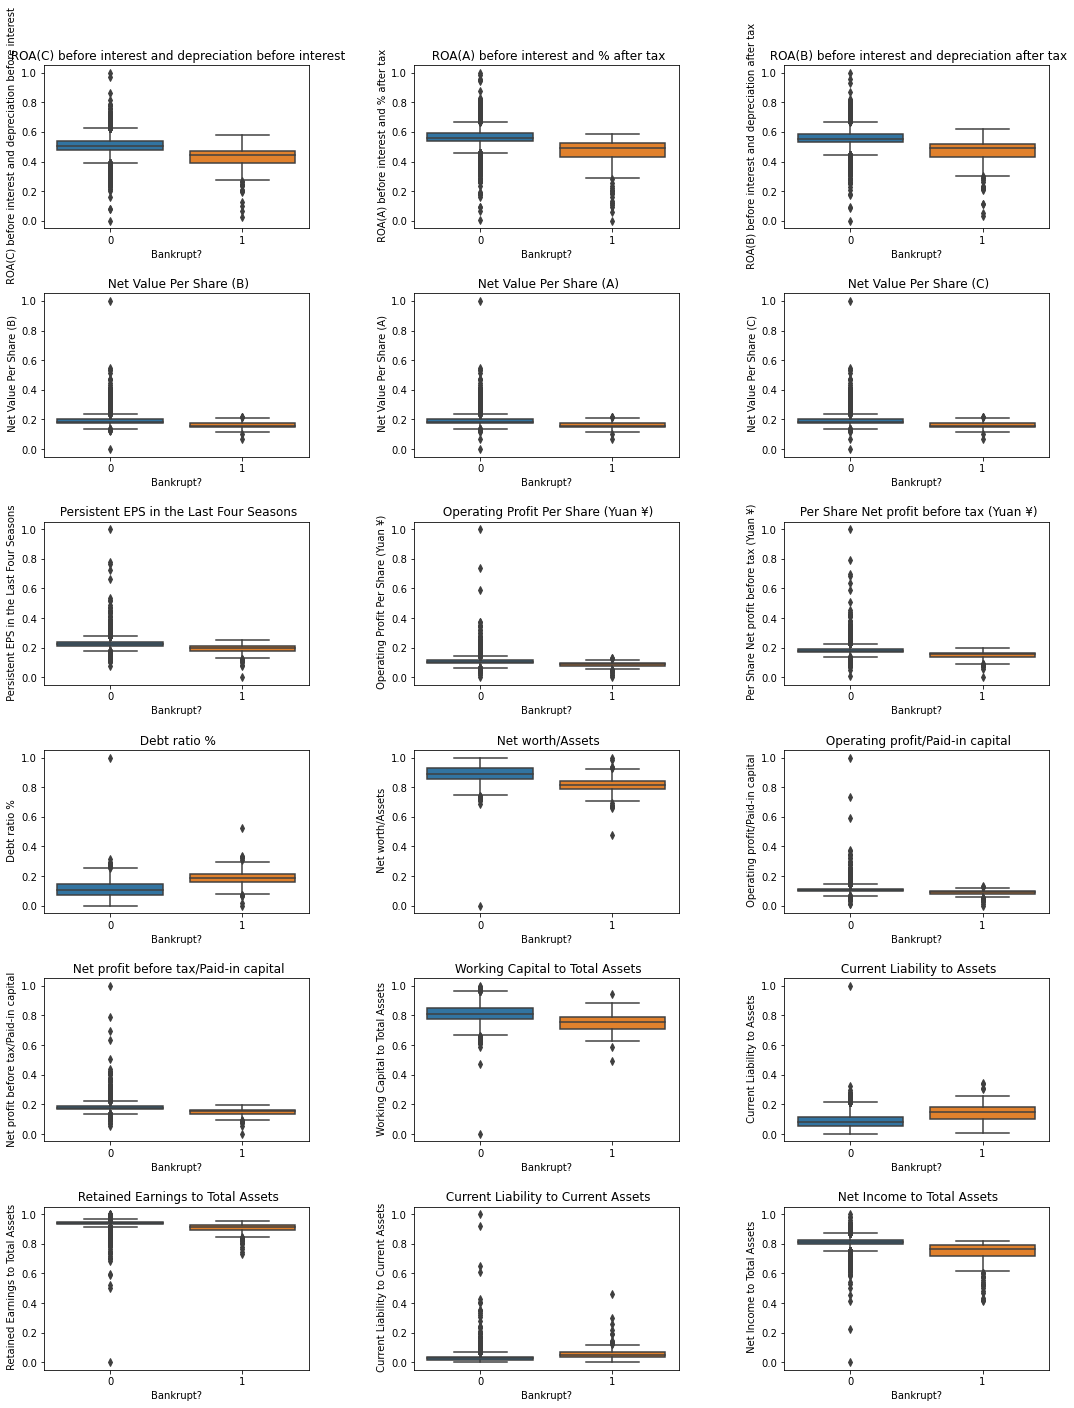

In [ ]:
# Create a figure with 6 rows and 3 columns
fig, axes = plt.subplots(6, 3, figsize=(18, 24))

# Iterate through the numerical features and create boxplots
for i, feature in enumerate(selected_features):
    ax = axes[i // 3, i % 3]
    sns.boxplot(x='Bankrupt?', y=feature, data=dataset, ax=ax)
    ax.set_title(feature)

# Adjust the spacing between plots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Save the figure
#plt.savefig('boxplots.png')

# Show the plot
plt.show()

**ROA(A), ROA(B), and ROA(C)** may be helpful to disguinish the bankruptcy company. Because the not bankrupt companies have higher median, right skewed and smaller spread of IQR than the bankrupt companies. That indicate that they have higher and stable return on their assets than the bankrupt companies. So, a company can use the return on asset to pay its annual debts.


The distributions of **Net Value Per Share (A, B, C)** are quite similar. For both bankrupt and non-bankrupt companies, the median values are close, but non-bankrupt companies have slightly higher median values. The range of values is larger for non-bankrupt companies.

**Profitability Metrics (Operating Profit Per Share, Net Profit Before Tax, Operating Profit/Paid-in Capital, Net Profit Before Tax/Paid-in Capital, Net Income to Total Assets)**: Non-bankrupt companies show better profitability, indicated by higher median values and wider distributions. They generate higher profits and utilize their capital more efficiently, resulting in better overall financial performance.

**Debt and Liability Metrics (Debt Ratio %, Current Liability to Assets, Current Liability to Current Assets)**: Bankrupt companies have higher debt ratios and liabilities, suggesting greater financial stress. Higher reliance on debt and significant short-term obligations point to liquidity issues and financial instability.

**Asset Efficiency Metrics (Net Worth/Assets, Working Capital to Total Assets, Retained Earnings to Total Assets)**: Non-bankrupt companies demonstrate superior asset efficiency with higher ratios. They maintain stronger equity positions, better liquidity, and reinvest more earnings, contributing to their financial stability and growth potential.”




#### 4.2.2 Correlation of selected features <a name="part422"></a>
The function `dataframe.corr()` is used to find the pairwise correlation of all columns in the `selected_feature` dataframe. Method of correlation is `pearson` standard correlation coefficient. Then we use `seaborn.heatmap` to plot the correlations.

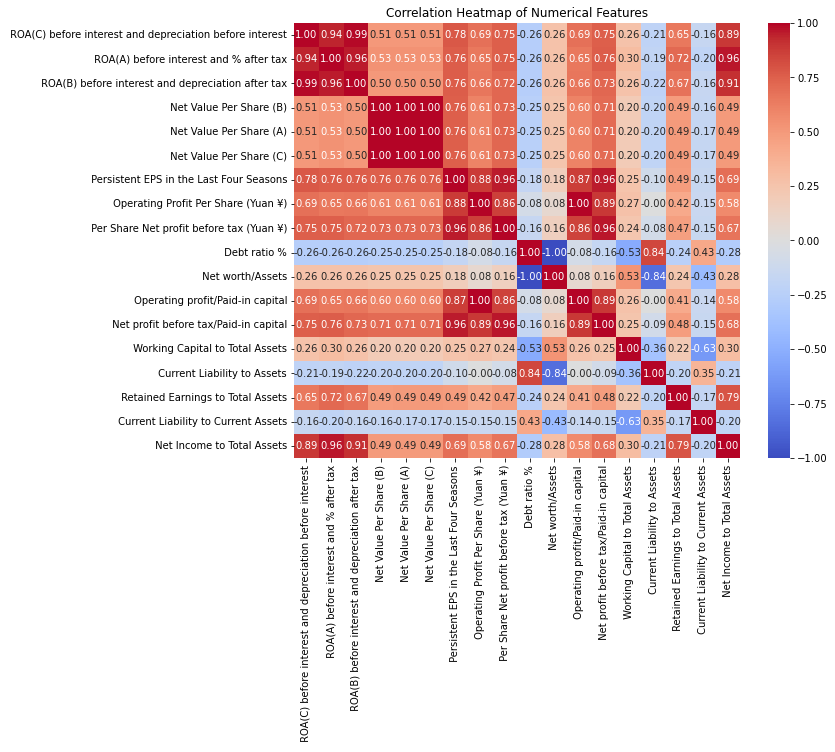

In [ ]:
# Calculate the correlation matrix between features
correlation_matrix_features = dataset[selected_features].corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix_features, annot=True, fmt=".2f", ax=ax, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
#plt.savefig('correlation_features_heatmap.png')
plt.show()

The correlation heatmap of numerical features provides several key insights about the relationships between different financial metrics. Here are some notable observations:

* **ROA Metrics**: ROA(C), ROA(A), and ROA(B) are highly correlated with each other (close to 1.00). This indicates that these three return on assets metrics move together and reflect similar underlying financial performance.

* **Net Value Per Share (A, B, C)**: These three metrics are perfectly correlated (1.00), showing that different calculations of net value per share provide consistent information.

* **Net Profit Metrics**: Operating Profit Per Share, Per Share Net Profit before Tax, Operating Profit/Paid-in Capital, and Net Profit before Tax/Paid-in Capital show high correlations (0.66 to 0.96). This suggests that profitability metrics are strongly linked and provide a consistent view of company performance.

* **Retained Earnings to Total Assets** is moderately correlated with profitability and efficiency metrics, such as ROA and net profit metrics (0.47 to 0.67).

* **Debt Ratio %** has moderate negative correlations with profitability metrics and net worth/assets ratios (-0.25 to -0.26). This indicates that higher debt levels are associated with lower profitability and net worth.

* **Current Liability to Assets** shows weak negative correlations with several metrics (-0.20 to -0.22), suggesting that higher current liabilities relative to assets might indicate weaker financial positions but not as strongly as debt ratio.

* **Working Capital to Total Assets**: This metric shows moderate positive correlations with profitability and efficiency metrics (0.26 to 0.30), indicating that higher working capital relative to total assets is associated with better financial health.

* **Net Income to Total Assets**: This metric has very high correlations with ROA metrics (0.89 to 0.96), reinforcing the importance of net income in evaluating return on assets.

#### Summary:
* **Profitability Metrics** (ROA, net profit measures) are strongly interrelated, reflecting consistent indicators of financial performance.

* **Debt Levels** (debt ratio, current liabilities) are negatively correlated with profitability, suggesting that higher debt is linked to poorer financial health.

* **Asset Efficiency** (net worth/assets, working capital/total assets) positively correlates with profitability metrics, indicating that efficient asset management contributes to better financial outcomes.




## 5. Data Modeling and Evaluation <a name="part5"></a>

For bankruptcy prediction, classification is typically used rather than regression. This is because bankruptcy prediction involves predicting a categorical outcome, specifically whether a company will go bankrupt (class 1) or not (class 0). Classification models are designed to handle such binary or multi-class outcomes effectively.

Firstly, we leverage several models to learn and train.
Secondly, we use our models to predict using the test data, and we fine-tune the models' parameters to ensure each model is best-fit.
Then, we focus on the accuracy of the predictions and blend the models with accuracy higher than 90% by using ensemble learning (Hard Voting).
Finally, we verify our aggregate model with test data and inspect our final accuracy.

### 5.1. Modeling <a name="part51"></a>

#### 5.1.1 Splitting data into training and test set <a name="part511"></a>

In [ ]:
y = df['Bankrupt?']
X = df.drop(columns=['Bankrupt?'])

# split data into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
# Printing the number of entries in each set
num_entries = {
    'Original dataset': df.shape[0],
    'Training set': y_train.shape[0],
    'Test set': y_test.shape[0],
    }

num_entries

{'Original dataset': 13198, 'Training set': 10558, 'Test set': 2640}

In [ ]:
# change the values of y_train, y_test from -1 and 1 into  0 and 1
y_train = np.where(y_train<=0,0,1)
y_test = np.where(y_test<=0,0,1)

#### 5.1.2 Build function to train and evaluate models <a name="part512"></a>
We initialize these lists to store names of models and values of metrics (accuracy, precision, recall, F1 score, and ROC AUC score).

In [ ]:
models = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

We defined a function `train_and_evaluate_model` that trains a machine learning model, evaluates its performance on the test dataset, and collects various performance metrics. Additionally, it prints out the confusion matrix, the number of misclassified instances and accuracy score of model.

In [ ]:
def train_and_evaluate_model(model, model_name):
    # Training the Model using the training data
    model.fit(X_train, y_train)
    # Using the trained model to make predictions on the test dataset
    y_pred = model.predict(X_test)
    # Calculating Performance Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_pred, average='macro')

    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)


    # Number of wrong classifier:
    # Number of predictions which differ from the validation data
    print('Number of wrong classifiers：%d' % (y_pred != y_test).sum())

    # Accuracy
    print(f"Accuracy score of '{model_name}': {acc* 100:.4f}%")

    # Appending the Metrics to Lists for later comparision
    accuracy_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    models.append(model_name)

Here are some commonly used machine learning classification algorithms for predicting bankruptcy:
1. **Stochastic Gradient Descent Classifier**
2. **Logistic Regression**
3. **Support Vector Machines (SVM)**
4. **Decision Trees**
5. **k-Nearest Neighbors (k-NN)**
6. **Random Forests**
7. **Gradient Boosting Classifier**
8. **Extreme Gradient Boosting Classifier**
9. **Extreme Gradient Boosting Random Forest Classifier**
10. **Hard Voting**

### 5.2 Models Analysis and Evaluation <a name="part52"></a>

Firstly, we train models with default parameters of the models.
Secondly, we try to get better results by tuning hyper-parameters of models using `RandomizedSearchCV` method.
`RandomizedSearchCV` is a hyperparameter tuning technique that searches for the best combination of hyperparameters by randomly sampling from a specified parameter grid. `RandomizedSearchCV` optimizes the hyperparameters the model, such as the number of trees, criterion for split, and maximum features considered. By exploring a wide range of hyperparameters efficiently, it enhances the model's performance and ensures that the chosen hyperparameters lead to the best predictive accuracy.

While fine-tuning hyper-parameters of models, we use the same settings.
For example,
`RandomizedSearchCV(LogisticRegression(), param_grid, verbose=3, cv=5)` 
* `LogisticRegression()`: The base model to be tuned. 
* `param_grid`: The hyperparameter grid to be defined. 
* `verbose=3`: Controls the verbosity: the higher, the more messages. 
* `cv=5`: The number of cross-validation folds.”

After getting results of all models we implemented, we will explain parameters of the best model, which parameters we choose to fine-tune. 

#### 5.2.1 Stochastic Gradient Descent Classifier

In [ ]:
train_and_evaluate_model(SGDClassifier(), 'SGDClassifier')

[[1185  149]
 [ 135 1171]]
Number of wrong classifiers：284
Accuracy score of 'SGDClassifier': 89.2424%


#### 5.2.2 Logistic Regression

In [ ]:
train_and_evaluate_model(LogisticRegression(), 'LogisticRegression')

[[1188  146]
 [ 106 1200]]
Number of wrong classifiers：252
Accuracy score of 'LogisticRegression': 90.4545%


In [ ]:
# define a parameter grid for fine-tuning the model using RandomizedSearchCV
param_grid = {'penalty': ['l1','l2','elasticnet'],
              'C': [0.001,0.01,0.1,0.5],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'multi_class': ['ovr', 'multinomial'],
              'l1_ratio': [0.2,0.5,0.8]
             }

grid_lr = RandomizedSearchCV(LogisticRegression(), param_grid, verbose=3, cv=5)
train_and_evaluate_model(grid_lr, 'RandomizedSearchCV_LogisticRegression')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.01, l1_ratio=0.5, multi_class=multinomial, penalty=elasticnet, solver=saga;, score=0.895 total time=   0.4s
[CV 2/5] END C=0.01, l1_ratio=0.5, multi_class=multinomial, penalty=elasticnet, solver=saga;, score=0.902 total time=   0.4s
[CV 3/5] END C=0.01, l1_ratio=0.5, multi_class=multinomial, penalty=elasticnet, solver=saga;, score=0.900 total time=   0.3s
[CV 4/5] END C=0.01, l1_ratio=0.5, multi_class=multinomial, penalty=elasticnet, solver=saga;, score=0.893 total time=   0.3s
[CV 5/5] END C=0.01, l1_ratio=0.5, multi_class=multinomial, penalty=elasticnet, solver=saga;, score=0.898 total time=   0.3s
[CV 1/5] END C=0.5, l1_ratio=0.5, multi_class=ovr, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, l1_ratio=0.5, multi_class=ovr, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, l1_ratio=0.5, multi_class=ovr, penalty=elasticnet, solve

#### 5.2.3 Support Vector Machine

In [ ]:
train_and_evaluate_model(SVC(kernel = 'linear', C = 2.0, random_state=1),
                         'Support Vector Machine')

[[1178  156]
 [  86 1220]]
Number of wrong classifiers：242
Accuracy score of 'Support Vector Machine': 90.8333%


In [ ]:
# define a parameter grid for fine-tuning the model using RandomizedSearchCV
param_grid = {'C': [0.001,0.01,0.1,1,5],
             'gamma': ['scale','auto'],
             'kernel': ['linear','poly','rbf','sigmoid'],
             'degree': [2,3,4,5],
             'shrinking': [True,False]
             }

grid_svm = RandomizedSearchCV(SVC(), param_grid, verbose=3, cv=5)
train_and_evaluate_model(grid_svm, 'RandomizedSearchCV_SVC' )

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=5, degree=3, gamma=auto, kernel=linear, shrinking=False;, score=0.902 total time=   5.1s
[CV 2/5] END C=5, degree=3, gamma=auto, kernel=linear, shrinking=False;, score=0.911 total time=   4.6s
[CV 3/5] END C=5, degree=3, gamma=auto, kernel=linear, shrinking=False;, score=0.909 total time=   5.1s
[CV 4/5] END C=5, degree=3, gamma=auto, kernel=linear, shrinking=False;, score=0.898 total time=   3.3s
[CV 5/5] END C=5, degree=3, gamma=auto, kernel=linear, shrinking=False;, score=0.913 total time=   5.3s
[CV 1/5] END C=0.1, degree=4, gamma=scale, kernel=sigmoid, shrinking=False;, score=0.821 total time=   1.0s
[CV 2/5] END C=0.1, degree=4, gamma=scale, kernel=sigmoid, shrinking=False;, score=0.852 total time=   1.0s
[CV 3/5] END C=0.1, degree=4, gamma=scale, kernel=sigmoid, shrinking=False;, score=0.838 total time=   1.0s
[CV 4/5] END C=0.1, degree=4, gamma=scale, kernel=sigmoid, shrinking=False;, score=0.840 total 

#### 5.2.4 Decision Tree

In [ ]:
train_and_evaluate_model(DecisionTreeClassifier(max_depth=30, random_state=1),
                         'DecisionTreeClassifier')

[[1231  103]
 [  72 1234]]
Number of wrong classifiers：175
Accuracy score of 'DecisionTreeClassifier': 93.3712%


In [ ]:
# fine-tune the model using RandomizedSearchCV
param_grid = {'criterion': ['gini','entropy','log_loss'],
              'splitter': ['best','random'],
              'max_features': ['auto','sqrt','log2']
             }

grid_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, verbose=3, cv=5)
train_and_evaluate_model(grid_dt, 'RandomizedSearchCV_DecisionTreeClassifier')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_features=log2, splitter=random;, score=0.926 total time=   0.0s
[CV 2/5] END criterion=gini, max_features=log2, splitter=random;, score=0.936 total time=   0.0s
[CV 3/5] END criterion=gini, max_features=log2, splitter=random;, score=0.924 total time=   0.0s
[CV 4/5] END criterion=gini, max_features=log2, splitter=random;, score=0.925 total time=   0.0s
[CV 5/5] END criterion=gini, max_features=log2, splitter=random;, score=0.927 total time=   0.0s
[CV 1/5] END criterion=entropy, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_features=auto, splitter=best;, sco

#### 5.2.5 K-Nearest Neighbors Classifier

In [ ]:
train_and_evaluate_model(KNeighborsClassifier(),
                         'KNeighborsClassifier')

[[1186  148]
 [  16 1290]]
Number of wrong classifiers：164
Accuracy score of 'KNeighborsClassifier': 93.7879%


In [ ]:
# define a parameter grid for fine-tuning the model using RandomizedSearchCV
param_grid = {'n_neighbors': [2,5,8,12,20],
              'weights': ['uniform','distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'metric': ['minkowski','manhattan','euclidean','chebyshev']
             }

grid_knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3, cv=5)
train_and_evaluate_model(grid_knn,'RandomizedSearchCV_KNeighborsClassifier')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=2, weights=distance;, score=0.963 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=2, weights=distance;, score=0.964 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=2, weights=distance;, score=0.955 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=2, weights=distance;, score=0.955 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=2, weights=distance;, score=0.966 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=8, weights=uniform;, score=0.947 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=8, weights=uniform;, score=0.943 total time=   0.2s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=8, weights=uniform;, score=0.930 total time=   0.2s
[CV 4/5] END algorithm=bal

### 5.2.6 Random Forest

In [ ]:
train_and_evaluate_model(RandomForestClassifier(n_estimators = 100, random_state=42),
                         'RandomForestClassifier')

[[1256   78]
 [  20 1286]]
Number of wrong classifiers：98
Accuracy score of 'RandomForestClassifier': 96.2879%


`param_grid` dictionary specifies the hyperparameters and their respective values that will be explored by RandomizedSearchCV.

* `n_estimators`: [200, 600, 1000]: The number of trees in the forest. More trees usually improve the performance of the model but also increase the computation time.

* `criterion`: ['gini', 'entropy', 'log_loss']: The function to measure the quality of a split:
    * 'gini': Gini impurity
    * 'entropy': Information gain (entropy)
    * 'log_loss': Logarithmic loss (not commonly used in Random Forests, more relevant for classification tasks like Logistic Regression)
    
* `max_features`: ['auto', 'sqrt', 'log2']: The number of features to consider when looking for the best split:
    * 'auto': Consider all features (equivalent to 'sqrt' for classification tasks)
    * 'sqrt': Square root of the number of features
    * 'log2': Logarithm base 2 of the number of features

* `bootstrap`: [True, False]: Whether bootstrap samples are used when building trees:
    * True: Use bootstrap samples
    * False: Do not use bootstrap samples

* `oob_score`: [True, False]: Whether to use out-of-bag samples to estimate the generalization accuracy:
    * True: Use out-of-bag samples
    * False: Do not use out-of-bag samples

* `class_weight`: ['balanced', 'balanced_subsample']: Weights associated with classes to handle class imbalance:
    * 'balanced': Adjust weights inversely proportional to class frequencies in the input data
    * 'balanced_subsample': Compute weights based on the bootstrap sample for each tree

In [ ]:
# define a parameter grid for fine-tuning the model using RandomizedSearchCV
param_grid = {'n_estimators': [200,600,1000],
              'criterion': ['gini','entropy','log_loss'],
              'max_features': ['auto','sqrt','log2'],
              'bootstrap': [True,False],
              'oob_score': [True,False],
              'class_weight': ['balanced','balanced_subsample']}

grid_rf = RandomizedSearchCV(RandomForestClassifier(), param_grid, verbose=3, cv=5)
train_and_evaluate_model(grid_rf, 'RandomizedSearchCV_RandomForestClassifier')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=auto, n_estimators=600, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=auto, n_estimators=600, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=auto, n_estimators=600, oob_score=True;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=auto, n_estimators=600, oob_score=True;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=auto, n_estimators=600, oob_score=True;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_features=sqrt, n_estimators=600, oob_score=False;, score=0.961 total time=  15.9s
[

#### 5.2.7 Gradient Boosting Classifier

In [ ]:
train_and_evaluate_model(GradientBoostingClassifier(n_estimators=100, random_state=42),
                         'GradientBoostingClassifier')

[[1206  128]
 [  63 1243]]
Number of wrong classifiers：191
Accuracy score of 'GradientBoostingClassifier': 92.7652%


In [ ]:
# define a parameter grid for fine-tuning the model using RandomizedSearchCV
param_grid = {'loss': ['log_loss','deviance','exponential'],
              'n_estimators': [200,600,1000],
              'learning_rate': [0.2,0.5,0.8,1],
              'criterion': ['absolute_error','friedman_mse', 'squared_error'],
              'max_features': ['auto','sqrt','log2']
             }

grid_gb = RandomizedSearchCV(GradientBoostingClassifier(),param_grid, verbose=3, cv=5)
train_and_evaluate_model(grid_gb,'RandomizedSearchCV_GradientBoostingClassifier')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=absolute_error, learning_rate=1, loss=log_loss, max_features=auto, n_estimators=600;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, learning_rate=1, loss=log_loss, max_features=auto, n_estimators=600;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, learning_rate=1, loss=log_loss, max_features=auto, n_estimators=600;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, learning_rate=1, loss=log_loss, max_features=auto, n_estimators=600;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, learning_rate=1, loss=log_loss, max_features=auto, n_estimators=600;, score=nan total time=   0.0s
[CV 1/5] END criterion=absolute_error, learning_rate=0.5, loss=deviance, max_features=auto, n_estimators=1000;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, learning_rate=0.5, loss=deviance, max_features=auto, n_estimators=100

#### 5.2.8 Extreme Gradient Boosting Classifier

In [ ]:
train_and_evaluate_model(XGBClassifier(n_estimators = 100, random_state = 42),
                         'XGBoostingClassifier')

[[1258   76]
 [  13 1293]]
Number of wrong classifiers：89
Accuracy score of 'XGBoostingClassifier': 96.6288%


In [ ]:
# define a parameter grid for fine-tuning the model using RandomizedSearchCV
param_grid = {
    'n_estimators': [200,600,1000],
    'learning_rate': [0.2,0.5,0.8,1],
    'booster': ['gbtree','gblinear','dart'],
    'importance_type': ['gain','weight','cover','total_gain','total_cover'],
    'sampling_method': ['uniform','gradient_based'],
    'grow_policy': [0,1]
}

grid_xgb = RandomizedSearchCV(XGBClassifier(), param_grid, verbose=3, cv=5)
train_and_evaluate_model(grid_xgb, 'RandomizedSearchCV_XGBClassifier')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END booster=gblinear, grow_policy=1, importance_type=total_cover, learning_rate=0.2, n_estimators=1000, sampling_method=gradient_based;, score=0.897 total time=   0.9s
[CV 2/5] END booster=gblinear, grow_policy=1, importance_type=total_cover, learning_rate=0.2, n_estimators=1000, sampling_method=gradient_based;, score=0.912 total time=   0.9s
[CV 3/5] END booster=gblinear, grow_policy=1, importance_type=total_cover, learning_rate=0.2, n_estimators=1000, sampling_method=gradient_based;, score=0.910 total time=   1.0s
[CV 4/5] END booster=gblinear, grow_policy=1, importance_type=total_cover, learning_rate=0.2, n_estimators=1000, sampling_method=gradient_based;, score=0.896 total time=   0.9s
[CV 5/5] END booster=gblinear, grow_policy=1, importance_type=total_cover, learning_rate=0.2, n_estimators=1000, sampling_method=gradient_based;, score=0.907 total time=   1.0s
[CV 1/5] END booster=gblinear, grow_policy=1, importan

[CV 5/5] END booster=gblinear, grow_policy=0, importance_type=total_gain, learning_rate=1, n_estimators=1000, sampling_method=gradient_based;, score=0.499 total time=   0.8s
[[1192  142]
 [ 108 1198]]
Number of wrong classifiers：250
Accuracy score of 'RandomizedSearchCV_XGBClassifier': 90.5303%


#### 5.2.9 Extreme Gradient Boosting Random Forest Classifier

In [ ]:
train_and_evaluate_model(XGBRFClassifier(), 'XGBRFClassifier')

[[1211  123]
 [  70 1236]]
Number of wrong classifiers：193
Accuracy score of 'XGBRFClassifier': 92.6894%


#### 5.2.10 Hard Voting

In [ ]:
train_and_evaluate_model(VotingClassifier(estimators=[
    ('DT', DecisionTreeClassifier(max_depth=30,random_state=1)),
    ('RF', RandomForestClassifier(n_estimators = 100,random_state=42)),
    ('SVC', SVC(kernel = 'linear', C = 2.0, random_state=1)),
    ('GB', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('XGB', XGBClassifier(n_estimators=100, random_state=42)),],
                 voting = 'hard'), 'VotingClassifier')

[[1239   95]
 [  21 1285]]
Number of wrong classifiers：116
Accuracy score of 'VotingClassifier': 95.6061%


In [ ]:
# Create a data frame to display scores of models
model_perfs = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1': f1_scores,
    'ROC-AUC': roc_auc_scores
})

# Sort by 'Accuracy' in descending order and reset the index
model_perfs = model_perfs.sort_values('Accuracy', ascending=False).reset_index(drop=True)

model_perfs

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,RandomizedSearchCV_RandomForestClassifier,0.970076,0.970695,0.970293,0.970073,0.970293
1,RandomizedSearchCV_GradientBoostingClassifier,0.968939,0.969695,0.969177,0.968935,0.969177
2,XGBoostingClassifier,0.966288,0.967128,0.966537,0.966282,0.966537
3,RandomizedSearchCV_KNeighborsClassifier,0.963636,0.965226,0.963970,0.963620,0.963970
4,RandomForestClassifier,0.962879,0.963571,0.963108,0.962874,0.963108
5,VotingClassifier,0.956061,0.957246,0.956353,0.956047,0.956353
6,KNeighborsClassifier,0.937879,0.941884,0.938402,0.937782,0.938402
7,RandomizedSearchCV_DecisionTreeClassifier,0.934470,0.934510,0.934547,0.934469,0.934547
8,DecisionTreeClassifier,0.933712,0.933852,0.933829,0.933712,0.933829
9,GradientBoostingClassifier,0.927652,0.928496,0.927905,0.927637,0.927905


### 5.3 Evaluating estimator performance of the best model  <a name="part53"></a>

In [ ]:
best_model = model_perfs.iloc[0]['Model']
best_model

'RandomizedSearchCV_RandomForestClassifier'

Even after completing hyperparameter tuning for all the models, none achieved an accuracy score as high as the `RandomizedSearchCV_RandomForestClassifier`. Therefore, it remains the best-performing model.

And evaluating a fine-tuned model using cross-validation ensures that the model's performance metrics are robust, reliable, and generalizable to new data. This step is essential to validate that the hyper-parameter tuning process has indeed improved the model. 

In [ ]:
avg_cv_scores = cross_val_score(grid_rf,
                                X_test,y_test, scoring='accuracy', verbose=3, cv=5)
mean_score = round(np.mean(avg_cv_scores),4)
print(f"Mean Cross Validation Performance of {best_model}: {mean_score*100}%")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=600, oob_score=False;, score=0.939 total time=   3.5s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=600, oob_score=False;, score=0.953 total time=   3.5s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=600, oob_score=False;, score=0.917 total time=   3.5s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=600, oob_score=False;, score=0.934 total time=   3.5s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=600, oob_score=False;, score=0.934 total time=   3.6s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_features=auto, n_estimators=200, oob_score=False;, score=nan total time=   0.

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=sqrt, n_estimators=1000, oob_score=False;, score=0.917 total time=   6.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=sqrt, n_estimators=1000, oob_score=False;, score=0.950 total time=   6.4s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=sqrt, n_estimators=1000, oob_score=False;, score=0.917 total time=   6.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=sqrt, n_estimators=1000, oob_score=False;, score=0.934 total time=   6.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=sqrt, n_estimators=1000, oob_score=False;, score=0.915 total time=   6.6s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_features=log2, n_estimators=1000, oob_score=False;, score=0.915 total time=   4.5s
[CV 2/5] END bootstrap=True, cl

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, oob_score=True;, score=0.922 total time=   0.8s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, oob_score=True;, score=0.934 total time=   0.8s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, oob_score=True;, score=0.927 total time=   0.8s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, oob_score=True;, score=0.938 total time=   0.8s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, oob_score=True;, score=0.919 total time=   0.8s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_features=auto, n_estimators=200, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterio

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_features=log2, n_estimators=600, oob_score=True;, score=0.927 total time=   3.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_features=log2, n_estimators=600, oob_score=True;, score=0.929 total time=   2.7s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_features=log2, n_estimators=600, oob_score=True;, score=0.938 total time=   2.7s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_features=log2, n_estimators=600, oob_score=True;, score=0.936 total time=   3.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_features=log2, n_estimators=600, oob_score=True;, score=0.917 total time=   3.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=sqrt, n_estimators=600, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] 

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=1000, oob_score=False;, score=0.945 total time=   6.4s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=1000, oob_score=False;, score=0.938 total time=   6.8s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=1000, oob_score=False;, score=0.931 total time=   6.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200, oob_score=False;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200, oob_score=False;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200, oob_score=False;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True,

Evaluating the performance of the  model fine-tuned `RandomForestClassifier` by `RandomizedSearchCV` using cross validation `cross_val_score` is thus able to maintain its performance level on the cross validation set which clearly suggests that there is no overfitting, the model's performance stable and reliable.

## 6. Conclusion and future work <a name="part6"></a>
The `RandomForestClassifier` with `RandomizedSearchCV` emerged as the best-performing model for bankruptcy prediction in Taiwan due to several key factors:
* Ensemble Learning: improves predictive accuracy by aggregating multiple trees.
* Feature Importance:  provides valuable insights into key predictors.
* Robustness and Flexibility ensure consistent performance across various conditions.

`RandomizedSearchCV` optimizes the model's hyperparameters, further enhancing its predictive capability.
These factors combined make the Random Forest with RandomizedSearchCV a powerful and reliable choice for predicting bankruptcy.


**Practical Implications:**

The ability to accurately predict bankruptcy has significant implications for financial institutions and businesses:
* Risk Management: Financial institutions can better manage credit risk and make informed lending decisions.
* Proactive Measures: Companies can take proactive measures to address financial distress and potentially avoid bankruptcy.
* Strategic Planning: Businesses can use these insights for strategic planning and improving their financial health.
